In [1]:
from sklearn.ensemble import RandomForestRegressor
import os
import torch
from torch.utils.data import Dataset,DataLoader
from torchmetrics import MeanAbsoluteError, MeanSquaredError
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, WeightedRandomSampler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from torchmetrics import MeanAbsoluteError, MeanSquaredError

In [2]:
# read in data 
pathData_train = '/pfs/data5/home/kit/lti/rk3078/JupyterNotebooks/data/dataset01_train.h5'
db_train = pd.read_hdf(pathData_train, 'df')
pathData_test = '/pfs/data5/home/kit/lti/rk3078/JupyterNotebooks/data/dataset01_test.h5'
db_test = pd.read_hdf(pathData_test, 'df')
pathData_all = '/pfs/data5/home/kit/lti/rk3078/JupyterNotebooks/data/dataset01_all.h5'
db_all = pd.read_hdf(pathData_all, 'df')

In [3]:
for column in ["meanThickness","stdThickness","rmsThickness"]:
    db_train[column] = pd.to_numeric(db_train[column])
    db_test[column] = pd.to_numeric(db_test[column])
    db_all[column] = pd.to_numeric(db_all[column])

# Correlation Coefficients

In [4]:
paramsList=["maxValueLP725","endPLLP725"]
labelList=["pce_backward","voc_backward","jsc_backward","ff_backward","meanThickness"]
for label in labelList:
    for param in paramsList:
        print(label,param)
        print(round(np.corrcoef(db_train[label], db_train[param])[0,1],3))

pce_backward maxValueLP725
0.327
pce_backward endPLLP725
-0.011
voc_backward maxValueLP725
0.026
voc_backward endPLLP725
0.117
jsc_backward maxValueLP725
0.169
jsc_backward endPLLP725
-0.015
ff_backward maxValueLP725
0.408
ff_backward endPLLP725
-0.069
meanThickness maxValueLP725
-0.608
meanThickness endPLLP725
0.609


# KNN regressor

pce_backward
splits:
0 baseline: 2.2372 mae: 2.3128 delta: 0.0338 for K= 7
1 baseline: 1.6022 mae: 0.9253 delta: -0.4225 for K= 14
2 baseline: 1.7117 mae: 1.4511 delta: -0.1522 for K= 7
3 baseline: 2.0249 mae: 1.4138 delta: -0.3018 for K= 5
4 baseline: 1.8622 mae: 1.5699 delta: -0.157 for K= 15


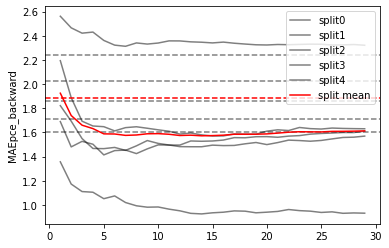

k_test: 14
mean over splits:
baseline: 1.8876 mae: 1.5718 delta: -0.1673
test set:
baseline: 1.9087 mae: 1.5323 delta: -0.1972


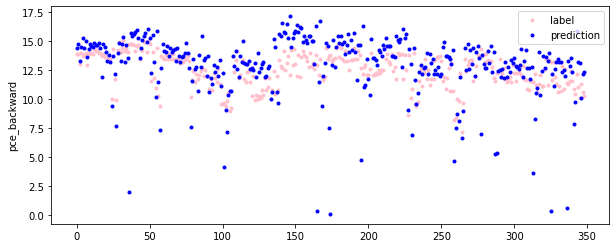

-----------------------------------------------------------------------
voc_backward
splits:
0 baseline: 0.0456 mae: 0.0436 delta: -0.0432 for K= 22
1 baseline: 0.013 mae: 0.0146 delta: 0.1192 for K= 26
2 baseline: 0.0204 mae: 0.0176 delta: -0.1379 for K= 21
3 baseline: 0.0348 mae: 0.0265 delta: -0.2384 for K= 1
4 baseline: 0.034 mae: 0.0296 delta: -0.1287 for K= 28


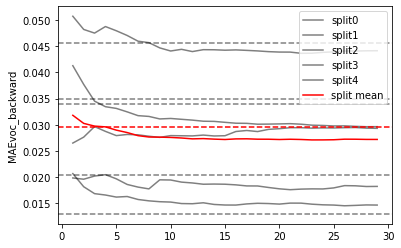

k_test: 23
mean over splits:
baseline: 0.0296 mae: 0.0271 delta: -0.0832
test set:
baseline: 0.0339 mae: 0.0286 delta: -0.156


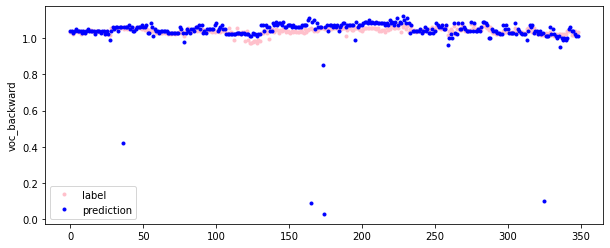

-----------------------------------------------------------------------
jsc_backward
splits:
0 baseline: 1.2106 mae: 1.2684 delta: 0.0477 for K= 29
1 baseline: 1.1874 mae: 0.8931 delta: -0.2478 for K= 29
2 baseline: 1.1988 mae: 1.033 delta: -0.1383 for K= 7
3 baseline: 1.5041 mae: 1.108 delta: -0.2633 for K= 8
4 baseline: 1.6655 mae: 1.4483 delta: -0.1304 for K= 15


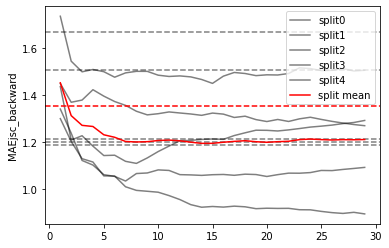

k_test: 14
mean over splits:
baseline: 1.3533 mae: 1.1932 delta: -0.1183
test set:
baseline: 1.2927 mae: 1.1104 delta: -0.141


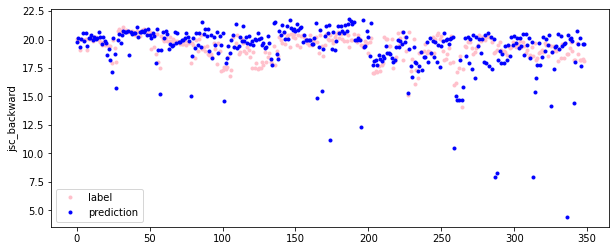

-----------------------------------------------------------------------
ff_backward
splits:
0 baseline: 7.4499 mae: 7.5779 delta: 0.0172 for K= 6
1 baseline: 5.5369 mae: 3.1079 delta: -0.4387 for K= 15
2 baseline: 6.2538 mae: 4.8978 delta: -0.2168 for K= 14
3 baseline: 6.8312 mae: 4.9395 delta: -0.2769 for K= 12
4 baseline: 5.9919 mae: 4.5616 delta: -0.2387 for K= 16


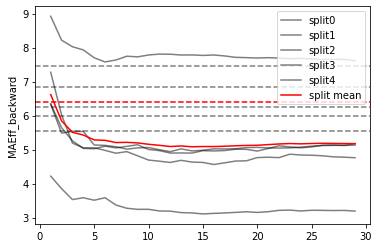

k_test: 14
mean over splits:
baseline: 6.4127 mae: 5.0828 delta: -0.2074
test set:
baseline: 6.4124 mae: 5.1182 delta: -0.2018


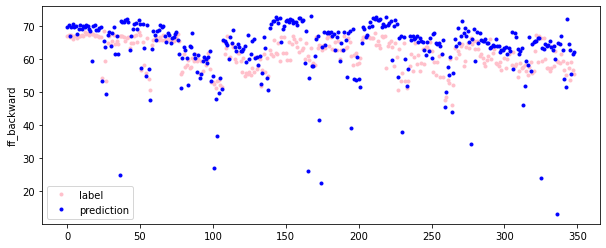

-----------------------------------------------------------------------
meanThickness
splits:
0 baseline: 139.9832 mae: 86.8547 delta: -0.3795 for K= 2
1 baseline: 137.8741 mae: 58.4342 delta: -0.5762 for K= 19
2 baseline: 125.9944 mae: 81.424 delta: -0.3537 for K= 29
3 baseline: 130.4548 mae: 78.8176 delta: -0.3958 for K= 6
4 baseline: 155.3243 mae: 82.2083 delta: -0.4707 for K= 16


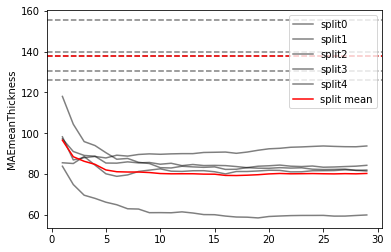

k_test: 17
mean over splits:
baseline: 137.9262 mae: 79.2103 delta: -0.4257
test set:
baseline: 139.7959 mae: 67.834 delta: -0.5148


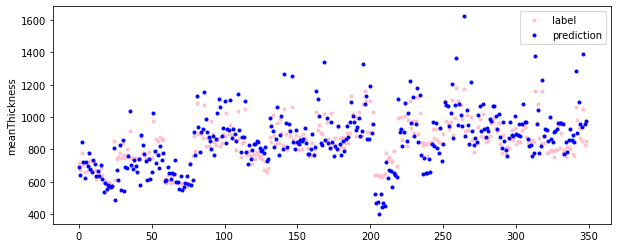

-----------------------------------------------------------------------
stdThickness
splits:
0 baseline: 48.2333 mae: 36.7328 delta: -0.2384 for K= 23
1 baseline: 41.7139 mae: 33.4725 delta: -0.1976 for K= 10
2 baseline: 36.4947 mae: 36.7656 delta: 0.0074 for K= 14
3 baseline: 42.7904 mae: 34.0401 delta: -0.2045 for K= 29
4 baseline: 44.0694 mae: 38.2488 delta: -0.1321 for K= 18


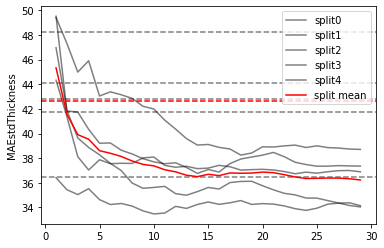

k_test: 29
mean over splits:
baseline: 42.6603 mae: 36.2284 delta: -0.1508
test set:
baseline: 36.9016 mae: 31.3052 delta: -0.1517


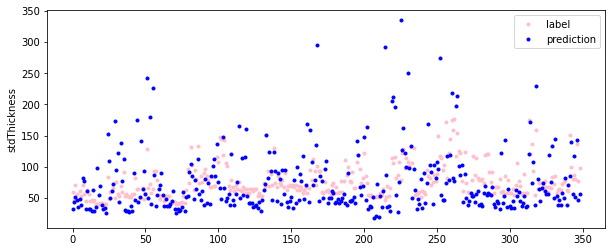

-----------------------------------------------------------------------
rmsThickness
splits:
0 baseline: 141.212 mae: 87.599 delta: -0.3797 for K= 2
1 baseline: 139.3474 mae: 57.8684 delta: -0.5847 for K= 19
2 baseline: 125.4445 mae: 80.817 delta: -0.3558 for K= 29
3 baseline: 131.9934 mae: 77.5972 delta: -0.4121 for K= 6
4 baseline: 157.3728 mae: 82.739 delta: -0.4742 for K= 17


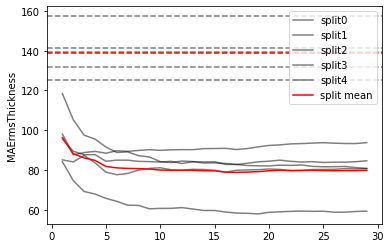

k_test: 17
mean over splits:
baseline: 139.074 mae: 78.7789 delta: -0.4335
test set:
baseline: 139.9796 mae: 67.0556 delta: -0.521


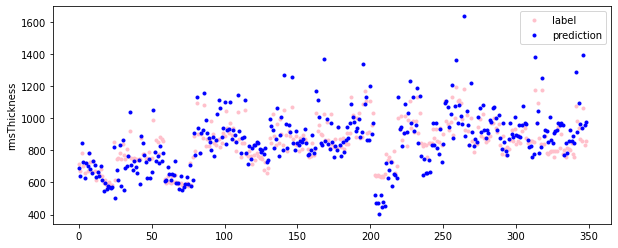

-----------------------------------------------------------------------


In [5]:
useSignal="LP725"

for useLabel in ["pce_backward", "voc_backward", "jsc_backward", "ff_backward", "meanThickness","stdThickness","rmsThickness"]:

    fig2, ax2 = plt.subplots()
    mae_all_folds=[]
    mae_all_folds_baseline=[]
    print(useLabel)
    print("splits:")
    
    for foldNumber in range(5):
        trainset=db_train[db_train["foldNo"]!=foldNumber].copy()
        validset=db_train[db_train["foldNo"]==foldNumber].copy()
        #print(len(trainset),len(validset))
                
        x_train=pd.DataFrame(data=np.vstack(trainset[useSignal].to_numpy()))
        y_train=trainset[useLabel]
        
        x_valid=pd.DataFrame(data=np.vstack(validset[useSignal].to_numpy()))
        y_valid=validset[useLabel]
        
        mae_current_fold=[]
  
        k_list = np.arange(1, 30)
        for k in k_list:
            knn = KNeighborsRegressor(k,weights='uniform')
            knn.fit(x_train, y_train)
            predictions = knn.predict(x_valid)
            
            mae = MeanAbsoluteError()        
            mae_current_fold.append(mae(torch.from_numpy(predictions), torch.from_numpy(np.array(y_valid))))



        baselineMAE=mae(torch.from_numpy(np.array([y_train.mean()]*len(y_valid))), torch.from_numpy(np.array(y_valid)))
        mae_all_folds.append(mae_current_fold)
        mae_all_folds_baseline.append(baselineMAE)
  
        ax2.plot(k_list, mae_current_fold, label='split'+str(foldNumber), color='black',alpha=0.5)
        ax2.axhline(y=baselineMAE, color="k", linestyle="dashed",alpha=0.5)
        ax2.legend()
        

        print(foldNumber, "baseline:", round(baselineMAE.item(),4), "mae:",round(mae_current_fold[np.argmin(mae_current_fold)].item(),4), 
              "delta:",round(mae_current_fold[np.argmin(mae_current_fold)].item()/baselineMAE.item()-1,4), "for K=", np.argmin(mae_current_fold)+1)
    
    ax2.plot(k_list, np.mean(np.array(mae_all_folds),axis=0), label='split mean', color='r')
    ax2.axhline(y=np.mean(mae_all_folds_baseline), color="r", linestyle="dashed")
    ax2.set_ylabel("MAE" + str(useLabel))
    ax2.legend()  
    plt.show()
    
    indMin=np.argmin(np.mean(np.array(mae_all_folds),axis=0))
    print("k_test:", indMin+1)
    print("mean over splits:")
    print("baseline:",round(np.mean(mae_all_folds_baseline),4), "mae:",round(np.mean(np.array(mae_all_folds),axis=0)[indMin],4), "delta:",round(np.mean(np.array(mae_all_folds),axis=0)[indMin]/np.mean(mae_all_folds_baseline)-1,4))
    
    #############################################
    
    k_test=indMin+1
    
    x_train=pd.DataFrame(data=np.vstack(db_train[useSignal].to_numpy()))
    y_train=db_train[useLabel]
    
    x_test=pd.DataFrame(data=np.vstack(db_test[useSignal].to_numpy()))
    y_test=db_test[useLabel]
    

            
    knn = KNeighborsRegressor(k_test)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)


    mae = MeanAbsoluteError()        
    mae_test=mae(torch.from_numpy(predictions), torch.from_numpy(np.array(y_test)))
    baselineMAE_test=mae(torch.from_numpy(np.array([y_train.mean()]*len(y_test))), torch.from_numpy(np.array(y_test)))

    print("test set:")
    print("baseline:",round(baselineMAE_test.item(),4),"mae:",round(mae_test.item(),4), "delta:",round(mae_test.item()/baselineMAE_test.item()-1,4))

    
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(predictions)),predictions, ".",color="pink", label="label")
    plt.plot(range(len(predictions)),y_test, ".",color="blue", label="prediction")
    plt.axis("tight")
    plt.ylabel(useLabel)
    plt.legend()
    plt.show()      
    print("-----------------------------------------------------------------------")
    
    
    
    #break